In [2]:
from google.colab import files
uploaded = files.upload()


Saving breast-cancer.csv to breast-cancer.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier



In [4]:
data=pd.read_csv("breast-cancer.csv")

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


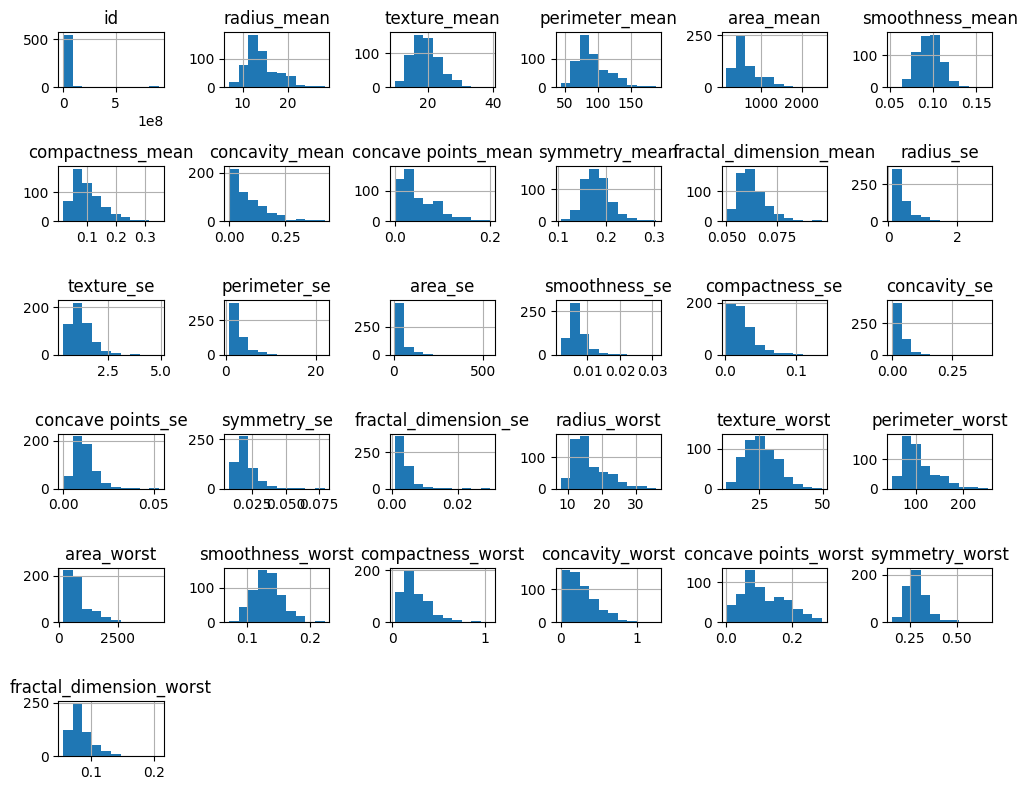

In [6]:
import matplotlib.pyplot as plt

# Veri setinin tüm sütunları için histogramları oluştur
data.hist(figsize=(10, 8))
plt.tight_layout()  # Grafiklerin daha düzgün görünmesini sağlar
plt.show()


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Check the dimensions of the dataset
print(data.shape)


(569, 32)


In [9]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)
else:
    print("'id' sütunu bulunamadı.")


In [10]:
# Encode the target variable 'diagnosis' (M=1, B=0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [11]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Standartlaştırılmış veriyi DataFrame'e dönüştürme
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Standartlaştırılmış verinin ilk 5 satırını gösterme
print("Standartlaştırılmış Eğitim Verisi:")
print(X_train_df.head())

print("\nStandartlaştırılmış Test Verisi:")
print(X_test_df.head())

Standartlaştırılmış Eğitim Verisi:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -0.931583     -1.585384       -0.960826  -0.827699        -0.803580   
1    -0.559847      0.739563       -0.595486  -0.549443        -1.040033   
2    -0.421139     -0.583053       -0.420495  -0.475549         1.177979   
3     0.086530     -1.283532        0.055578  -0.028932         0.149483   
4    -0.554298      2.474633       -0.626201  -0.552421        -1.397613   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -1.108993       -0.976708            -0.936437      -1.315974   
1         -1.016226       -0.917061            -0.964627      -0.961068   
2          0.139978       -0.646779            -0.512026       1.190784   
3         -0.296165       -0.104966            -0.158611      -0.232576   
4         -1.365217       -1.130941            -1.293768      -0.374539   

   fractal_dimension_mean  ...  radius_worst  texture_wor

Eğitim seti doğruluğu: 1.0
Test seti doğruluğu: 0.9254385964912281

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       148
           1       0.86      0.94      0.90        80

    accuracy                           0.93       228
   macro avg       0.91      0.93      0.92       228
weighted avg       0.93      0.93      0.93       228



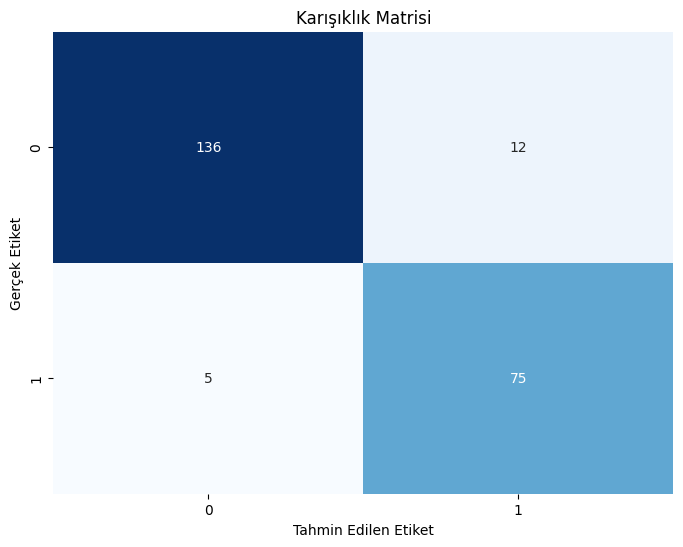

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# DecisionTreeClassifier modelini oluşturma
model = DecisionTreeClassifier()

# Modeli eğitme
model.fit(X_train, y_train)

# Eğitim seti üzerinde modelin doğruluğunu değerlendirme
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Eğitim seti doğruluğu:", train_accuracy)

# Test seti üzerinde modelin doğruluğunu değerlendirme
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test seti doğruluğu:", test_accuracy)

# Sınıflandırma raporunu görüntüleme
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, test_predictions))

# Karışıklık matrisini görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()
